# Showcase of scikit-learn

As the title says, this is only a showcase.  
For actual documentation, refer to the [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html).

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import toolbox as tb
import kaggleData as kD
from sklearn import linear_model as linMod
from sklearn import neighbors
from sklearn import cross_validation
import matplotlib.patches as mpatches

In [8]:
n = 100000
toy_data = tb.createToyData(n,dim = 4,s_prob = 0.05)
toy_weights = toy_data[:,0]
toy_labels = toy_data[:,1]
x = toy_data[:,2:4]

Populating the interactive namespace from numpy and matplotlib


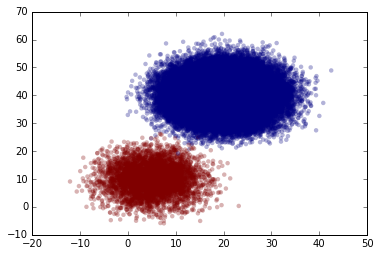

In [9]:
%pylab inline
plt.scatter(x[:,0], x[:,1], edgecolor="", c=toy_labels, alpha=0.3)

In [10]:
n_train = int(n/10)

toy_train_x = x[:n_train]
toy_test_x = x[n_train:]

toy_train_labels = toy_labels[:n_train]
toy_test_labels  = toy_labels[n_train:]

toy_test_weights = toy_weights[n_train:]

In [11]:
tb.calcMaxAMS(toy_test_weights,toy_test_labels);

Found 4469 signals.
Weightsums signal: 111.640995142 | background: 0
Maximum AMS possible with this Data: 19.61008348715598


In [12]:
logReg = linMod.LogisticRegression(C=1e5)

In [13]:
logReg.fit(toy_train_x,toy_train_labels)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
pred = logReg.predict(toy_test_x)

In [97]:
x

array([-10.        ,  -8.97959184,  -7.95918367,  -6.93877551,
        -5.91836735,  -4.89795918,  -3.87755102,  -2.85714286,
        -1.83673469,  -0.81632653,   0.20408163,   1.2244898 ,
         2.24489796,   3.26530612,   4.28571429,   5.30612245,
         6.32653061,   7.34693878,   8.36734694,   9.3877551 ,
        10.40816327,  11.42857143,  12.44897959,  13.46938776,
        14.48979592,  15.51020408,  16.53061224,  17.55102041,
        18.57142857,  19.59183673,  20.6122449 ,  21.63265306,
        22.65306122,  23.67346939,  24.69387755,  25.71428571,
        26.73469388,  27.75510204,  28.7755102 ,  29.79591837,
        30.81632653,  31.83673469,  32.85714286,  33.87755102,
        34.89795918,  35.91836735,  36.93877551,  37.95918367,
        38.97959184,  40.        ])

In [96]:
logReg.decision_function(x)

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: X has 50 features per sample; expecting 2

In [84]:
logReg.intercept_

array([ 20.31439706])

Populating the interactive namespace from numpy and matplotlib


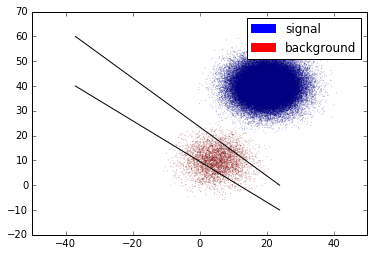

In [94]:
%pylab inline

xData = toy_test_x[:,0]
yData = toy_test_x[:,1]
x = np.linspace(-10,40)
y = np.linspace(0,60)
z = (x*logReg.coef_[0,0]+y*logReg.coef_[0,1]+1*logReg.intercept_)

scat = plt.scatter(xData, yData, s=1, edgecolor="", c=pred, alpha=0.3)  

blue_patch = mpatches.Patch(color='blue', label='signal')
red_patch = mpatches.Patch(color='red', label='background')
plt.legend(handles=[blue_patch,red_patch])

#xy = plt.plot(x,y,color="black")
zy = plt.plot(z,y,color="black")
xz = plt.plot(z,x,color="black")

#yx = plt.plot((x*logReg.coef_[0,0]+logReg.intercept_),(y*logReg.coef_[0,1]),color="black")